# Data Cleaning, Organization and Visualization

## Imports

In [446]:
import pandas as pd
import scipy as sc
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import linear_model, metrics, preprocessing, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from collections import Counter
from flexitext import flexitext
from matplotlib.patches import FancyArrowPatch
import plotly.express as px

## Raw Data Cleanup and Handling

In [537]:
df = pd.read_csv("raw_data.csv")
tempdf = pd.read_csv("data_firsts.csv")
df = pd.concat([df,tempdf])
df = df.copy()
df = df.drop('Unnamed: 0', axis=1) #7510 rows × 42 columns

#Drop duplicated links
df.drop_duplicates(subset='Link', keep='last', inplace=True) #4209 rows × 42 columns

In [538]:
#Drop un-needed rows
df.dropna(thresh = 10, inplace = True)
df.dropna(subset = 'Name Romaji', inplace = True)
df.dropna(subset = 'Start Year', inplace = True)
df.dropna(subset = 'Status', inplace = True) 

#Fixing index col after rows delete
df = df.reset_index() 
df = df.drop('index', axis=1) 

#Filling NaN values before merging 
df['Rating 10'].fillna(0, inplace=True)
df['Rating 20'].fillna(0, inplace=True)
df['Rating 30'].fillna(0, inplace=True)
df['Rating 40'].fillna(0, inplace=True)
df['Rating 50'].fillna(0, inplace=True)
df['Rating 60'].fillna(0, inplace=True)
df['Rating 70'].fillna(0, inplace=True)
df['Rating 80'].fillna(0, inplace=True)
df['Rating 90'].fillna(0, inplace=True)
df['Rating 100'].fillna(0, inplace=True)

#Filling missing numeric values
df['Favorites'].fillna(df['Favorites'].mean(), inplace=True)
df['Rating Rank'].fillna(0, inplace=True)
df['Popularity Rank'].fillna(0, inplace=True)
df['Volume Count'].fillna(df['Volume Count'].mean(), inplace=True)
df['Popularity'].fillna(df['Popularity'].median(), inplace=True)
df['Anime Release Date'].fillna(df['Anime Release Date'].median(), inplace=True)

#Filling missing non-numeric values
df.Source = df.Source.fillna(df.Source.mode()[0])

for i in range(0, df.shape[0]):
    if df.loc[i,'Name English'] is np.nan:
        df.loc[i,'Name English'] = df.loc[i,'Name Romaji']
    if df.loc[i,'Name Native'] is np.nan:
        df.loc[i,'Name Native'] = df.loc[i,'Name Romaji']
    if df.loc[i,'Synonyms'] is np.nan:
        df.loc[i,'Synonyms'] = df.loc[i,'Name Romaji']
    if df.loc[i,'Tag_One'] is np.nan:
        df.loc[i,'Tag_One'] = 'No Tag'
    if df.loc[i,'Tag_Two'] is np.nan:
        df.loc[i,'Tag_Two'] = 'No Tag'
    if df.loc[i,'Tag_Three'] is np.nan:
        df.loc[i,'Tag_Three'] = 'No Tag'
    if df.loc[i,'Genre_One'] is np.nan:
        df.loc[i,'Genre_One'] = 'No Genre'
    if df.loc[i,'Genre_Two'] is np.nan:
        df.loc[i,'Genre_Two'] = 'No Genre'
    if df.loc[i,'Genre_Three'] is np.nan:
        df.loc[i,'Genre_Three'] = 'No Genre'
        
    df['Average Rating'] = (((df['Rating 10'])*10 + (df['Rating 20'])*20 + (df['Rating 30'])*30 + (df['Rating 40'])*40 +
                            (df['Rating 50'])*50 + (df['Rating 60'])*60 + (df['Rating 70'])*70 + (df['Rating 80'])*80 +
                            (df['Rating 90'])*90 + (df['Rating 100'])*100)/((df['Rating 10']) + (df['Rating 20']) + 
                            (df['Rating 30']) + (df['Rating 40']) +(df['Rating 50']) + (df['Rating 60']) + (df['Rating 70'])
                            + (df['Rating 80']) +(df['Rating 90']) + (df['Rating 100']))) #Adding average
    
    #New Column: Does it got an adaptation?
    if ((df.loc[i,'Related 1 Type'] == 'TV · Releasing') or (df.loc[i,'Related 2 Type'] == 'TV · Releasing') or
        (df.loc[i,'Related 1 Type'] == 'Movie · Finished') or (df.loc[i,'Related 2 Type'] == 'Movie · Finished') or
        (df.loc[i,'Related 1 Type'] == 'OVA · Finished') or (df.loc[i,'Related 2 Type'] == 'OVA · Finished') or
        (df.loc[i,'Related 1 Type'] == 'ONA · Finished') or (df.loc[i,'Related 2 Type'] == 'ONA · Finished') or
        (df.loc[i,'Related 1 Type'] == 'ONA · Releasing') or (df.loc[i,'Related 2 Type'] == 'ONA · Releasing') or
        (df.loc[i,'Related 1 Type'] == 'TV Short · Finished') or (df.loc[i,'Related 2 Type'] == 'TV Short · Finished') or
        (df.loc[i,'Related 1 Type'] == 'TV · Finished') or (df.loc[i,'Related 2 Type'] == 'TV · Finished') or
        (df.loc[i,'Related 1 Type'] == 'Special · Finished') or (df.loc[i,'Related 2 Type'] == 'Special · Finished')):
        df.loc[i,'Adaptation'] = 1
    else:
        df.loc[i,'Adaptation'] = 0

for i in range(0, df.shape[0]):
    if np.isnan(df.loc[i,'Average Rating']):
        df.loc[i,'Average Rating'] = df.loc[i,'Mean Score']
    if df.loc[i,'Adaptation'] is np.nan:
        df.loc[i,'Adaptation'] = df.loc[i,'Has Anime']
df['Average Rating'].fillna(df['Average Rating'].mean(), inplace=True)

#Dropping unnecessary columns
df = df.drop(['Rating 10','Rating 20','Rating 30','Rating 40','Rating 50','Rating 60',
             'Rating 70','Rating 80','Rating 90','Rating 100'], axis=1)
df = df.drop('Chapter Count', axis=1)
df = df.drop('End Date', axis=1)
df = df.drop('Average Score', axis=1)
df = df.drop('Mean Score', axis=1)
df = df.drop('Related 1 Type', axis=1)
df = df.drop('Related 2 Type', axis=1)
df = df.drop('Popularity Number', axis=1)
df = df.drop('Rating Number', axis=1)
df = df.drop('Format', axis=1)

#After cleanup: 4078 rows × 25 columns

In [140]:
#Change type to save space
df["Name Romaji"] = df["Name Romaji"].astype('category')
df["Name Native"] = df["Name Native"].astype('category')
df["Name English"] = df["Name English"].astype('category')
df["Synonyms"] = df["Synonyms"].astype('category')
df["Status"] = df["Status"].astype('category')
df["Source"] = df["Source"].astype('category')
df["Genre_One"] = df["Genre_One"].astype('category')
df["Genre_Two"] = df["Genre_Two"].astype('category')
df["Genre_Three"] = df["Genre_Three"].astype('category')
df["Tag_One"] = df["Tag_One"].astype('category')
df["Tag_Two"] = df["Tag_Two"].astype('category')
df["Tag_Three"] = df["Tag_Three"].astype('category')
df["Start Date"] = df["Start Date"].astype('category')
df["Rating Rank"] = df["Rating Rank"].astype('category')
df["Popularity Rank"] = df["Popularity Rank"].astype('category')

replace_map_Genre = {'Drama':1, 'Adventure':2, 'Action':3, 'Comedy':4, 'Mystery':5, 'Romance':6, 'Fantasy':7,
 'Horror':8, 'Sci-Fi':9, 'Psychological':10, 'Ecchi':11, 'Supernatural':12, 'Music':13,
 'Thriller':14, 'Slice of Life':15, 'Sports':16, 'Mahou Shoujo':17, 'Mecha':18, 'No Genre':0}
replace_map_Source = {'Original':1 , 'Manga':2 , 'Visual Novel':3 , 'Video Game':4 , 'Web Novel':5 ,'Other':6 ,
                      'Light Novel':7 ,'Multimedia Project':8 , 'Game':9 , 'Novel':10 , 'Live Action':11 , 'Anime':12}

df.replace(replace_map_Genre, inplace = True)
df.replace(replace_map_Source, inplace = True)

df = pd.get_dummies(df, columns=['Status'], prefix = ['Status'])
#df = pd.get_dummies(df, columns=['Source'], prefix = ['Source'])

In [361]:
df.to_csv('clean_data.csv')
df.to_excel('clean_data.xlsx')

In [539]:
df = df.sample(frac = 1).reset_index()

## Basic Data Exploration

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078 entries, 0 to 4077
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Name Romaji              4078 non-null   category
 1   Name Native              4078 non-null   category
 2   Name English             4078 non-null   category
 3   Synonyms                 4078 non-null   category
 4   Volume Count             4078 non-null   float64 
 5   Start Date               4078 non-null   category
 6   Start Year               4078 non-null   float64 
 7   Popularity               4078 non-null   float64 
 8   Favorites                4078 non-null   float64 
 9   Source                   4078 non-null   category
 10  Genre_One                4078 non-null   category
 11  Genre_Two                4078 non-null   category
 12  Genre_Three              4078 non-null   category
 13  Tag_One                  4078 non-null   category
 14  Tag_Two 

In [431]:
df.describe(include='all')

,Name Romaji,Name Native,Name English,Synonyms,Volume Count,Start Date,Start Year,Popularity,Favorites,Source,...,Name Word Count,Link,Average Rating,Adaptation,Status_Cancelled,Status_Finished,Status_Hiatus,Status_Not Yet Released,Status_Releasing,Average Rating Binned
count,4078,4078,4078,4078,4078.000000,4078,4078.000000,4078.000000,4078.000000,4078.0,...,4078.000000,4078,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078
unique,4076,4076,4076,4068,NaN,2151,NaN,NaN,NaN,12.0,...,NaN,4078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
top,"Shokugyou, Shounin",魔界帰りの劣等能力者,Denshi Toshi DT,Ao Buta\n青ブタ\nSeishun Buta Yarou Series\n青春ブタ野...,NaN,"Apr 10, 2020",NaN,NaN,NaN,1.0,...,NaN,https://anilist.co/manga/115898/Kuraki-Kyuuden...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70-79
freq,2,2,2,4,NaN,12,NaN,NaN,NaN,3649.0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2438
mean,NaN,NaN,NaN,NaN,3.288627,NaN,2015.001962,289.659637,20.754139,NaN,...,6.948504,NaN,72.448721,0.141736,0.003923,0.624080,0.005395,0.005150,0.361452,NaN
std,NaN,NaN,NaN,NaN,3.213046,NaN,5.923103,1132.973926,90.142019,NaN,...,4.887029,NaN,11.085849,0.348822,0.062522,0.484419,0.073260,0.071584,0.480480,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,1982.000000,1.000000,1.000000,NaN,...,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,1.000000,NaN,2013.000000,18.000000,2.000000,NaN,...,3.000000,NaN,70.769231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,3.288627,NaN,2016.000000,46.000000,15.000000,NaN,...,6.000000,NaN,72.448721,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,3.288627,NaN,2019.000000,158.750000,20.754139,NaN,...,9.000000,NaN,77.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,NaN


In [143]:
df['Has Anime'].value_counts(normalize=True)

False    0.850417
True     0.149583
Name: Has Anime, dtype: float64

## Looking at the Number of Adaptations Per Genre

In [141]:
#Label and color genres, for better visualization
gen_labels = ['Drama', 'Adventure', 'Action', 'Comedy', 'Mystery','Romance','Fantasy','Horror','Sci-Fi',
                'Psychological','Ecchi','Supernatural','Music','Thriller','Slice of Life','Sports','Mahou Shoujo','Mecha','No Genre']
gen_colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','aquamarine','maroon','violet','darkcyan',
              'darkorchid','darkgreen','darkolivegreen','purple']

In [327]:
gen_names = ['Drama', 'Adventure', 'Action', 'Comedy', 'Mystery','Romance','Fantasy','Horror','Sci-Fi',
                'Psychological','Ecchi','Supernatural','Music','Thriller','Slice of Life','Sports','Mahou Shoujo','Mecha','No Genre']
gen_num_books = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
gen_num_anime = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for g in df["Genre_One"]:
    gen_num_books[g]+= 1
    
for g2 in df["Genre_Two"]:
    gen_num_books[g2]+= 1
    
for g3 in df["Genre_Three"]:
    gen_num_books[g3]+= 1
    
    
for ai, a1 in df.iterrows():
    gen_num_anime[a1["Genre_One"]] += a1["Has Anime"]
    gen_num_anime[a1["Genre_Two"]] += a1["Has Anime"]
    gen_num_anime[a1["Genre_Three"]] += a1["Has Anime"]


gen_data = {"Genre Names":gen_names,
            "Number of Books":gen_num_books,
            "Number of Anime":gen_num_anime,
                                                }
gen_df = pd.DataFrame({'Number of Books':gen_num_books,
                       'Number of Anime':gen_num_anime},
                      index = gen_names)

gen_df = gen_df.drop(labels = ['No Genre'],axis = 0)

C:\Users\john\AppData\Local\Temp\ipykernel_25280\3859273435.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(gen_df.index, rotation = 90, fontsize = 15)
C:\Users\john\AppData\Local\Temp\ipykernel_25280\3859273435.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(gen_df.index, rotation = 90, fontsize = 15)


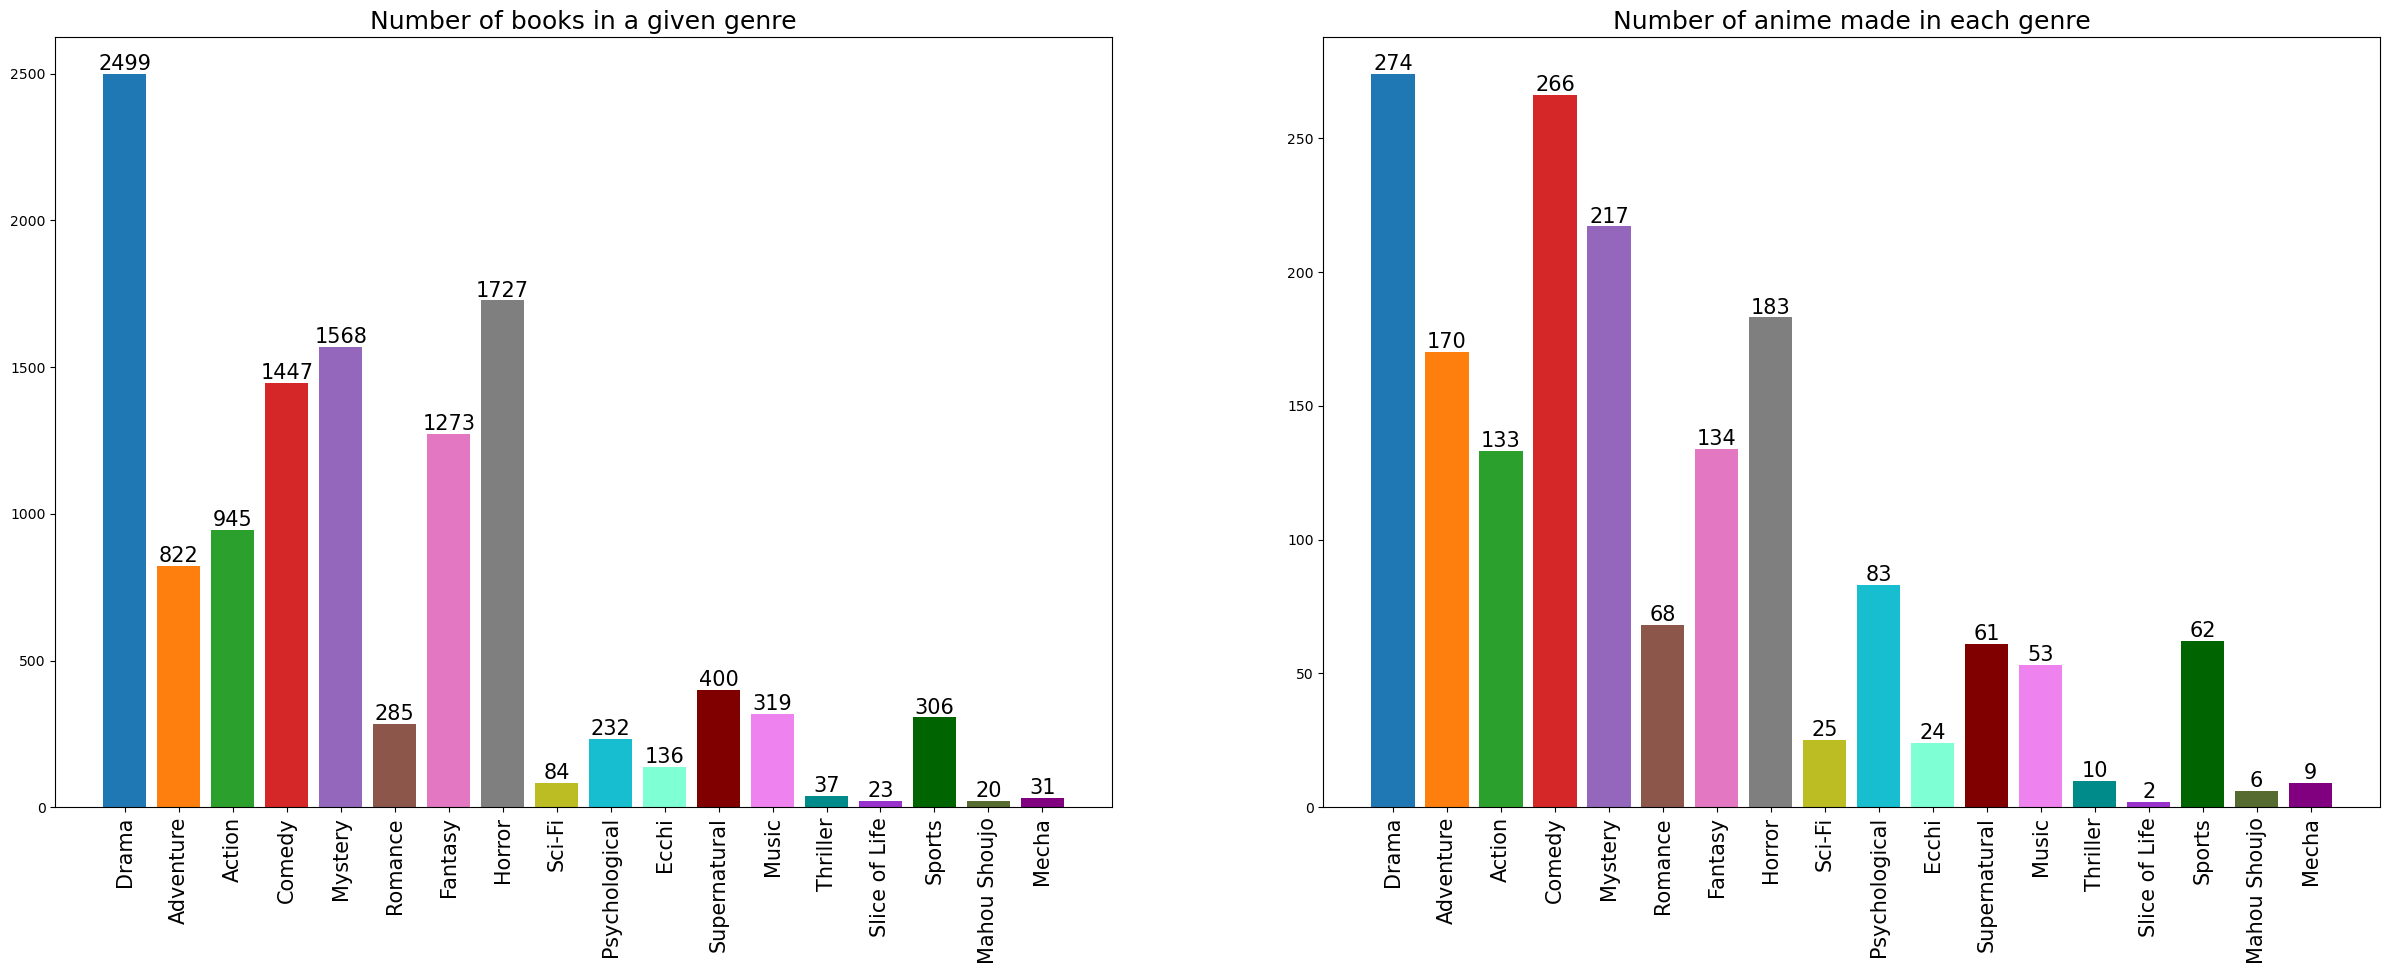

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(30,10))

temp_gen_copy = gen_df.copy()

axs[0].bar(gen_df.index, gen_df["Number of Books"], color = gen_colors)
axs[1].bar(gen_df.index, gen_df["Number of Anime"], color = gen_colors)

axs[0].set_title("Number of books in a given genre", fontsize=18)
axs[1].set_title("Number of anime made in each genre", fontsize=18)

axs[0].set_xticklabels(gen_df.index, rotation = 90, fontsize = 15)
axs[1].set_xticklabels(gen_df.index, rotation = 90, fontsize = 15)

axs[0].bar_label(axs[0].containers[0], label_type='edge', fontsize = 15)
axs[1].bar_label(axs[1].containers[0], label_type='edge', fontsize = 15)

plt.show()

#### Our code took genres in groups of three, this is due to two reasons:
#### - This is how Anilist lists a given book's genres.
#### - The order of genres indicates a level of significance for each genre.

In [546]:
ct1=pd.crosstab(df['Genre_One'],df['Has Anime'],normalize='index')
ct1 = ct1.reindex(gen_labels)

ct2=pd.crosstab(df['Genre_Two'],df['Has Anime'],normalize='index')
ct2 = ct2.sort_index()

ct3=pd.crosstab(df['Genre_Three'],df['Has Anime'],normalize='index')
ct3 = ct3.sort_index()


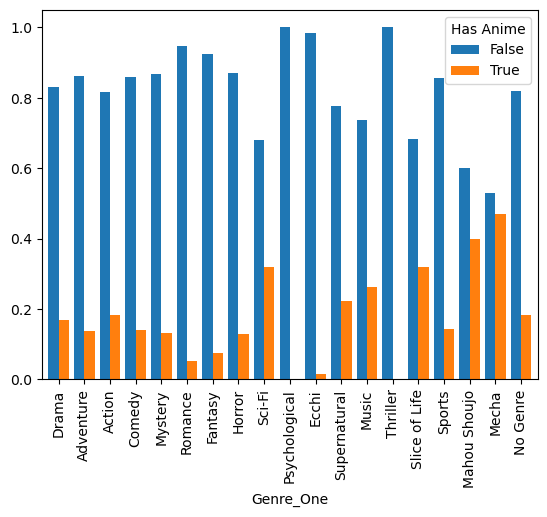

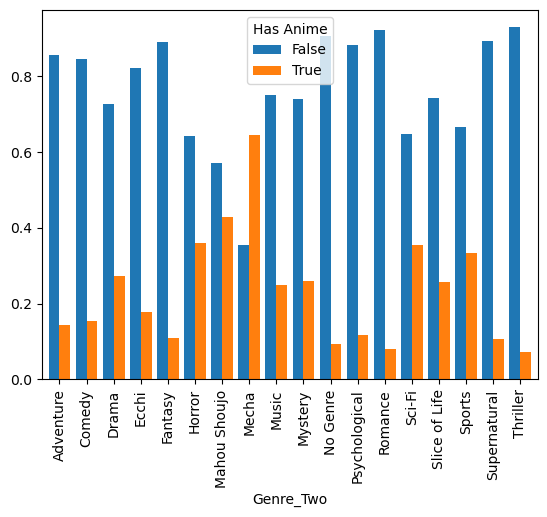

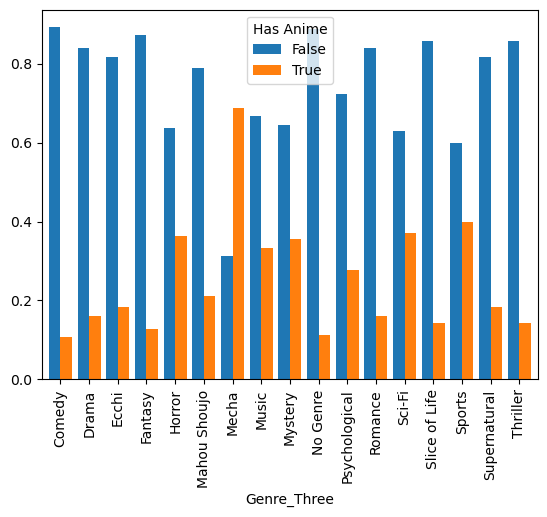

In [547]:
ct1.plot(kind = "bar", width = 0.8)
ct2.plot.bar(width = 0.8)
ct3.plot.bar(width = 0.8)
plt.show()

## Looking at the Number of Adaptations According to Average Rating

In [410]:
averbins = [0,10,20,30,40,50,60,70,80,90,100]
averlabels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100']
df["Average Rating Binned"] = pd.cut(df['Average Rating'], bins = averbins, labels = averlabels)

averbins_num = [0,0,0,0,0,0,0,0,0,0]
averanim_num = [0,0,0,0,0,0,0,0,0,0]

for ai, av in df.iterrows():
    averbins_num[averlabels.index(av["Average Rating Binned"])] += 1
    averanim_num[averlabels.index(av["Average Rating Binned"])] += av["Has Anime"]
    
aver_df = pd.DataFrame({"Number of Books":averbins_num,
                        "Number of Anime":averanim_num},
                       index = averlabels)



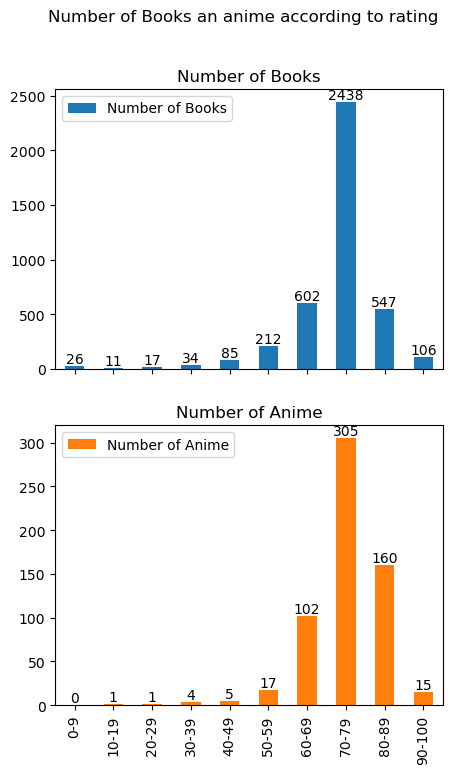

In [427]:
avx = aver_df.plot.bar(figsize = (5,8), title = "Number of Books an anime according to rating", subplots = True)

for container in avx[0].containers:
    avx[0].bar_label(container)
for container2 in avx[1].containers:
    avx[1].bar_label(container2)    


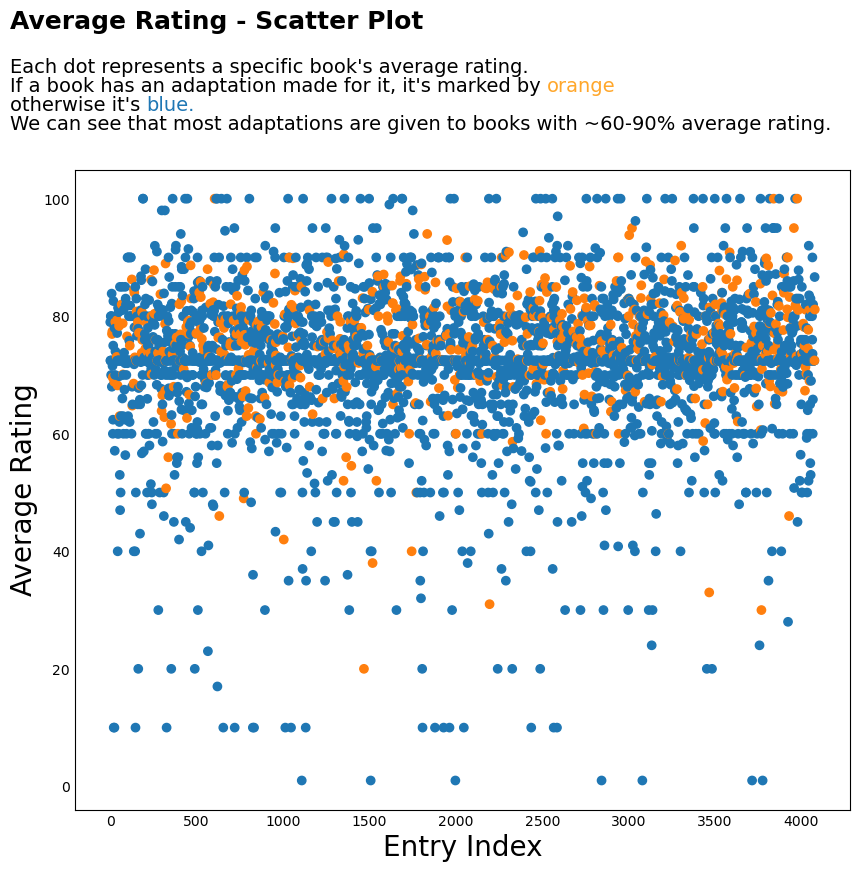

In [541]:
vert_axis = df['Average Rating'].values
hor_axis = df["Average Rating"].index
color = df["Has Anime"].values

colors = np.where(color == 0, 'tab:blue', 'tab:orange')

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(hor_axis, vert_axis, c=colors, alpha = 1);
fig.subplots_adjust(top=0.75)




# Add subtitle
subtitle = """<size:18><weight:bold>Average Rating - Scatter Plot\n</></>
<size:14><weight:normal>Each dot represents a specific book's average rating.
If a book has an adaptation made for it, it's marked by <color:#ffa72b>orange</> 
otherwise it's <color:#1F77B4>blue.</>
We can see that most adaptations are given to books with ~60-90% average rating.\n</></>
"""  



flexitext(0.06, 0.91, subtitle, va="top", xycoords="figure fraction", ax=ax)
# Remove frame (or all the spines at the same time)
ax.set_frame_on(True)

# Set a label for the horizontal axis
ax.set_xlabel("Entry Index", size=20, weight="light")
ax.set_ylabel("Average Rating", size=20, weight="light")
# Remove tick marks from both axes
ax.tick_params(length=0)

## Looking at the Number of Adaptations Made According to Book Release Year

In [326]:
years = [1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023]
num_anim_years = [0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0]

for yi, y1 in df.iterrows():
    num_anim_years[years.index(y1["Start Year"])] += y1["Has Anime"]

yer_df = pd.DataFrame({"Num of Anime":num_anim_years},
                     index = years)

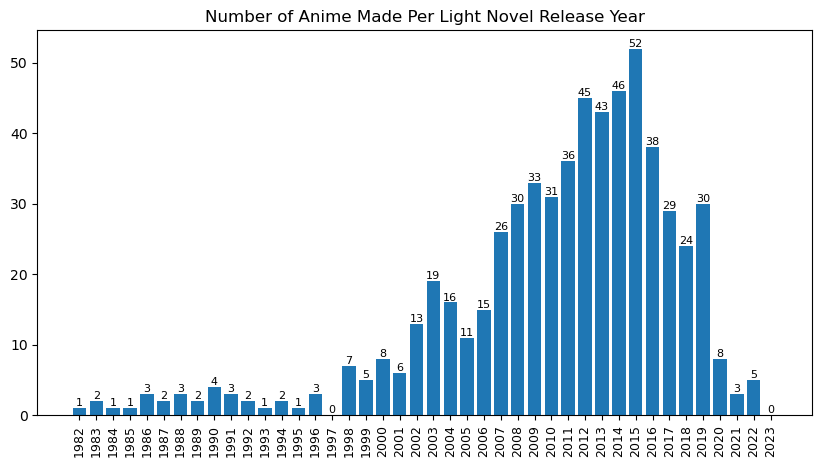

In [325]:
fig5, ax5 = plt.subplots(figsize = (10,5))

p5 = ax5.bar(yer_df.index, yer_df["Num of Anime"])

ax5.set_xticks(yer_df.index)
ax5.set_xticklabels(yer_df.index,rotation=90, ha='center', fontsize = 9)
ax5.set_title("Number of Anime Made Per Light Novel Release Year")

plt.bar_label(p5,label_type='edge', fontsize = 8)
plt.show()